In [214]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm

In [5]:
csv = pd.read_excel("EconomicIndicators2020.xlsx")
csv.head()

,No,Country,Continent,LifeExpect,GDPPC,MfgMn$,AgriMn$,CO2kt,HealthPC$,Pop_mn
0,1,Afghanistan,Asia,62.58,516.87,1546.26,5402.59,8709.47,80.29,38.97
1,2,Albania,Europe,76.99,5343.04,933.42,2915.07,4383.20,NaN,2.84
2,3,Algeria,Africa,74.45,3354.16,27257.32,20089.32,161563.00,214.85,43.45
3,4,Angola,Africa,62.26,1502.95,3548.57,4997.28,19814.50,50.74,33.43
4,5,Antigua and Barbuda,North America,78.84,15284.77,29.88,30.34,474.60,830.34,0.09


In [6]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          177 non-null    int64  
 1   Country     177 non-null    object 
 2   Continent   177 non-null    object 
 3   LifeExpect  177 non-null    float64
 4   GDPPC       177 non-null    float64
 5   MfgMn$      177 non-null    float64
 6   AgriMn$     177 non-null    float64
 7   CO2kt       167 non-null    float64
 8   HealthPC$   164 non-null    float64
 9   Pop_mn      177 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 14.0+ KB


In [125]:
csv.describe()

,No,LifeExpect,GDPPC,MfgMn$,AgriMn$,CO2kt,HealthPC$,Pop_mn
count,177.000000,177.000000,177.000000,1.770000e+02,1.770000e+02,1.670000e+02,164.000000,177.000000
mean,89.000000,72.670395,16590.260056,7.354169e+04,2.007267e+04,1.882131e+05,1228.635427,42.125932
std,51.239633,7.361974,24174.474210,3.483750e+05,9.458137e+04,9.330497e+05,2006.410951,154.097014
min,1.000000,52.780000,435.470000,2.020000e+00,0.000000e+00,5.690000e+01,17.950000,0.040000
25%,45.000000,67.990000,2446.080000,1.030400e+03,4.891900e+02,3.783650e+03,113.595000,1.790000
50%,89.000000,73.650000,5965.450000,3.819320e+03,2.954240e+03,1.494920e+04,391.895000,8.440000
75%,133.000000,78.080000,20398.060000,2.752534e+04,1.017377e+04,7.504955e+04,1189.547500,29.350000
max,177.000000,85.500000,165284.500000,3.860698e+06,1.130757e+06,1.094469e+07,11702.410000,1411.100000


In [245]:
#Q1a 
avg_life = csv['LifeExpect'].mean()
avg_life
#72.67

72.67039548022599

In [246]:
#Q1b
avg_continentlife = csv.groupby('Continent')['LifeExpect'].mean()
var_continentlife = csv.groupby('Continent')['LifeExpect'].var()

print(avg_continentlife)
print()
print(var_continentlife)
#avglife as follows, and Oceania had the biggest variation.

Continent
Africa           63.968636
Asia             74.774222
Europe           78.630698
North America    74.066000
Oceania          71.599000
South America    73.444000
Name: LifeExpect, dtype: float64

Continent
Africa           36.400533
Asia             30.862643
Europe           15.132397
North America    13.244375
Oceania          40.301121
South America    19.447538
Name: LifeExpect, dtype: float64


In [258]:
csv.groupby('Continent')['LifeExpect'].describe()

,count,mean,std,min,25%,50%,75%,max
Continent,,,,,,,,
Africa,44.0,63.968636,6.033285,52.78,60.0075,62.685,66.590,77.24
Asia,45.0,74.774222,5.555416,62.58,70.4200,74.800,78.950,85.50
Europe,43.0,78.630698,3.890038,70.17,75.7500,80.530,82.035,83.21
North America,25.0,74.066000,3.639282,64.05,71.8000,73.420,76.980,81.14
Oceania,10.0,71.599000,6.348316,64.98,67.4325,70.435,72.310,83.20
South America,10.0,73.444000,4.409936,64.47,72.4075,73.840,75.610,79.38


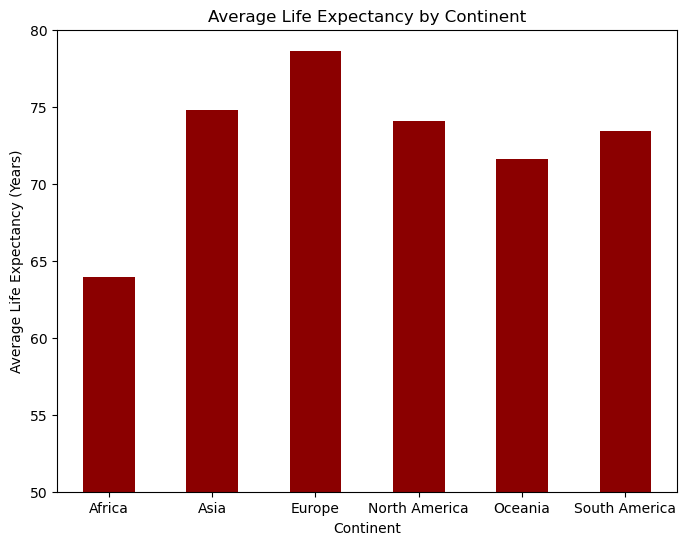

In [247]:
plt.figure(figsize=(8, 6))
avg_continentlife.plot(kind = 'bar', color = 'darkred')
plt.title('Average Life Expectancy by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Life Expectancy (Years)')
plt.xticks(rotation=0)
plt.ylim(50, 80)
plt.show()
#Africa apparently live shorter than other,
#while Europe relatively slightly live longer

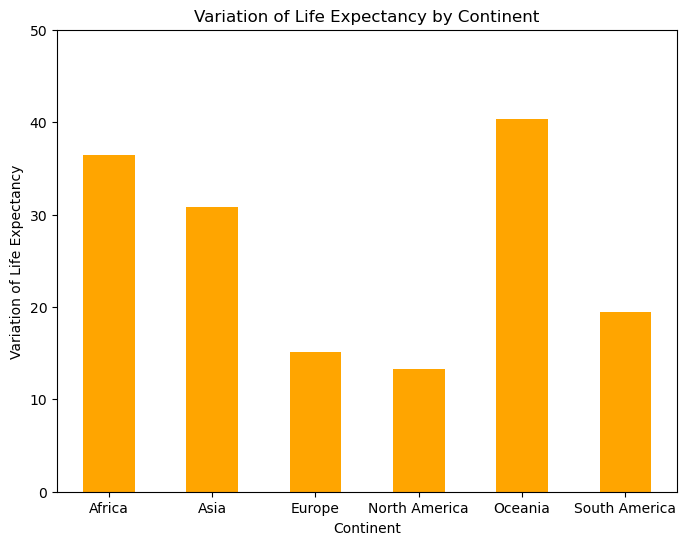

In [248]:
plt.figure(figsize=(8, 6))
var_continentlife.plot(kind = 'bar', color = 'orange')
plt.title('Variation of Life Expectancy by Continent')
plt.xlabel('Continent')
plt.ylabel('Variation of Life Expectancy')
plt.xticks(rotation=0)
plt.ylim(0, 50)
plt.show()
#Europe & North America & Sourth America have significantly lower VAR, 
#which shows there're only slight difference between counrties there

#and the VAR of the rest are all around 30~40

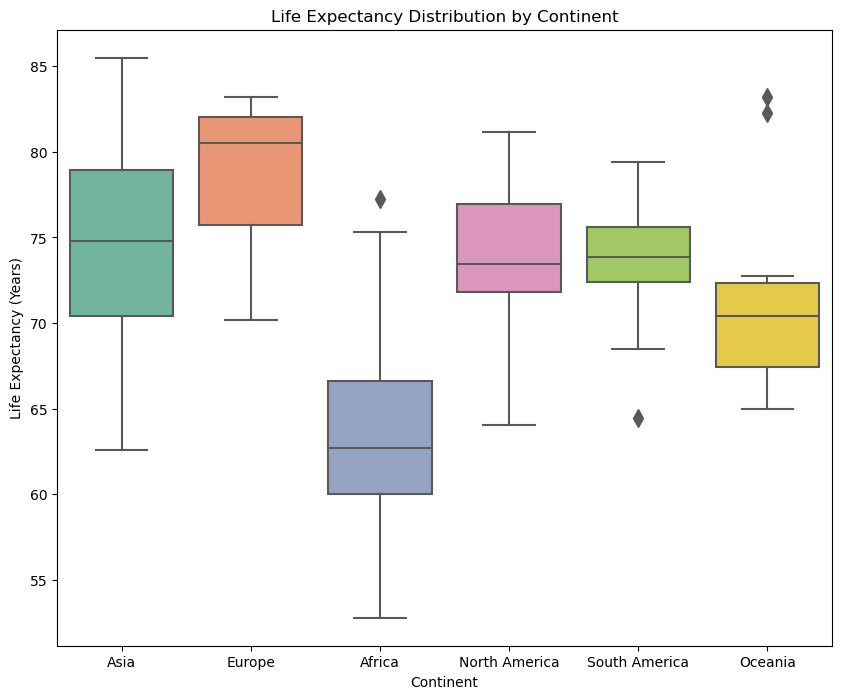

In [249]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Continent', y = 'LifeExpect', data=csv,
            palette='Set2',  linewidth=1.5,  showfliers=True, 
            flierprops = dict(markersize = 9))
plt.title('Life Expectancy Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Life Expectancy (Years)')
plt.show()

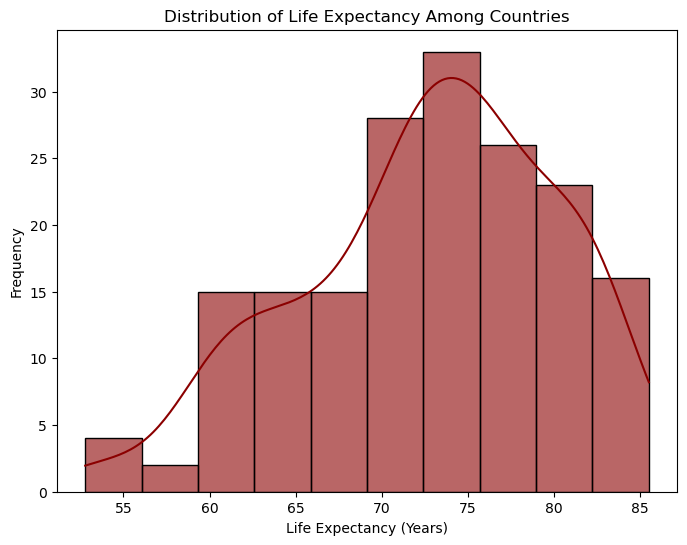

In [250]:
#Q1c  #use kde
plt.figure(figsize=(8, 6))
sns.histplot(csv['LifeExpect'], kde=True, color='darkred',alpha=0.6)
plt.title('Distribution of Life Expectancy Among Countries')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')
plt.show()

In [251]:
#Q2
#math
#suggest avg life expectancy=70, 99% confidence interval.
n = 177;  mu = 70;  avg = 72.670;  std = 7.362; #H0: mu=70, H1: mu/=70, 
#tstat = (avg−μ) / (s/√n)

a = math.sqrt(177)
b = avg-mu
print(a,b)

t = (avg-mu) / (7.36/ math.sqrt(177))
print(t)

#p=3.0106E-06   #reject

13.30413469565007 2.6700000000000017
4.8263640811665365


In [252]:
#scipy
hypothesis = csv['LifeExpect'].dropna()
tstat, p = stats.ttest_1samp(hypothesis, 70)
#CI % =1-0.99  #0.01

solve = {"t_statistic":tstat  ,  "p_value":p  ,  "reject_null": p < 0.01}
solve
#yes, reject

{'t_statistic': 4.825784830727795,
 'p_value': 3.0106331354163777e-06,
 'reject_null': True}

the correlation between these two is: 0.6199429253099713


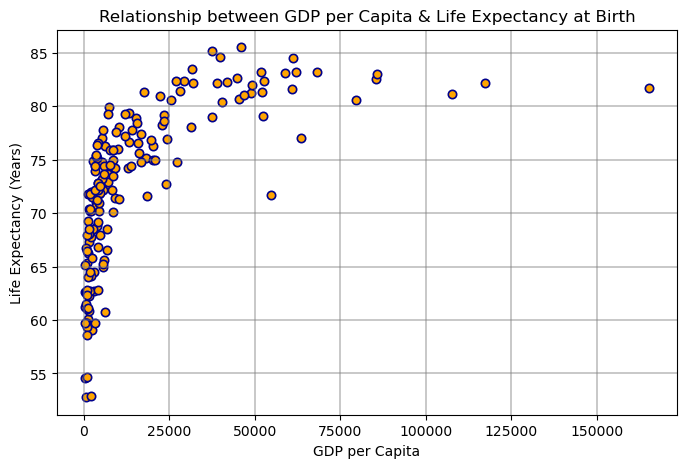

In [253]:
#Q3
corr = csv['GDPPC'].corr(csv['LifeExpect'])
print("the correlation between these two is:", corr)
#positive

plt.figure(figsize=(8, 5))
sns.scatterplot(x='GDPPC', y='LifeExpect', data=csv,
                color='orange',edgecolor='darkblue', linewidth=1.2)
plt.title('Relationship between GDP per Capita & Life Expectancy at Birth')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True, color='grey', alpha=0.5, linewidth=1.2)
plt.show()

In [254]:
#statsmodels.api
X = csv['GDPPC']  
y = csv['LifeExpect'] 
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             LifeExpect   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           3.56e-20
Time:                        03:54:04   Log-Likelihood:                -561.07
No. Observations:                 177   AIC:                             1126.
Df Residuals:                     175   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.5382      0.529    131.555      0.0

69.53824853766626 0.00018879432461537047


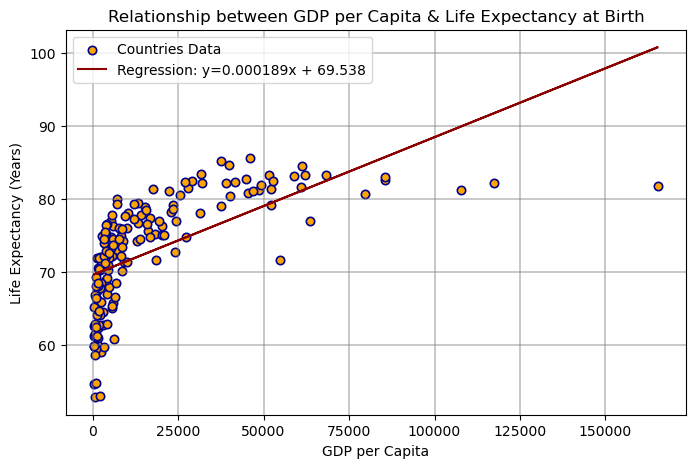

In [255]:
intercept, slope = model.params
print(intercept, slope)
regressionline = intercept + slope * csv['GDPPC']

plt.figure(figsize=(8, 5))
sns.scatterplot(x='GDPPC', y='LifeExpect', data=csv, label='Countries Data',
                color='orange',edgecolor='darkblue',linewidth=1.2)
plt.plot(csv['GDPPC'], regressionline, color='darkred', linewidth=1.5, label='Regression: y=0.000189x + 69.538')
plt.legend()

plt.title('Relationship between GDP per Capita & Life Expectancy at Birth')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True, color='grey', alpha=0.5, linewidth=1.2)

plt.show()

In [256]:
predictors = csv[['GDPPC', 'MfgMn$', 'AgriMn$', 'CO2kt', 'HealthPC$', 'Pop_mn']]

# Adding a constant to the predictors
predictors = sm.add_constant(predictors)

# Handling any NaN values in the predictors and dependent variable
predictors = predictors.dropna()
y = csv.loc[predictors.index, 'LifeExpect']

# Fitting a multiple regression model
multiple_regression_model = sm.OLS(y, predictors).fit()

# Outputting the summary of the multiple regression model
multiple_regression_summary = multiple_regression_model.summary()
multiple_regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LifeExpect   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     21.81
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.46e-18
Time:                        03:54:05   Log-Likelihood:                -509.25
No. Observations:                 164   AIC:                             1033.
Df Residuals:                     157   BIC:                             1054.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.7034      0.560    122.753      0.000      67.598      69.809
GDPPC          0.0002   6.49e-05      3.266      0.001    8.38e-05       0.000
MfgMn$     -2.319e-06   5.67e-06     -0.409      0.683   -1.35e-05    8.87e-06
AgriMn$     2.853e-05   2.99e-05      0.954      0.342   -3.06e-05    8.76e-05
CO2kt      -1.543e-08   3.21e-06     -0.005      0.996   -6.36e-06    6.33e-06
HealthPC$      0.0005      0.001      0.660      0.510      -0.001       0.002
Pop_mn        -0.0110      0.010     -1.138      0.257      -0.030       0.008
==============================================================================
Omnibus:                       17.588   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.152
Skew:                          -0.849   Prob(JB):                     4.21e-05
Kurtosis:                       3.263   Cond. No.                     1.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

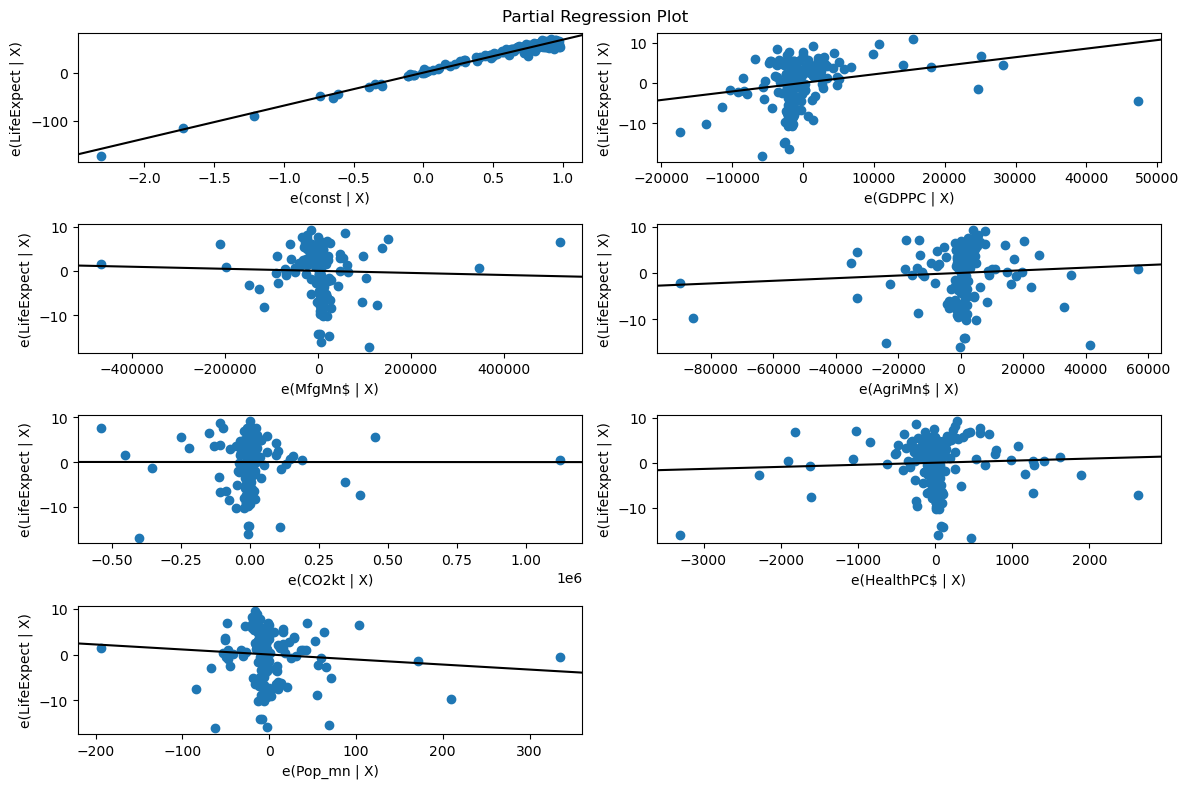

In [257]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(multiple_regression_model, fig=fig)